Develop highly accurate models to detect anomalies using Artificial Neural Networks with the Tensorflow library in Python3.

**Task:** Xredit Card/Fraud Anomaly detection with ANN
For the purposes of this task, the dataset we will be using consists of credit card transactions by European cardholders.

**Dataset:**
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in **two days**, where we have **492 frauds** out of *284,807 transactions*. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues,the original features and more background information about the data cannot be provided. 

Features V1, V2, … V28 are the principal components obtained with PCA,* the only features which have not been transformed with PCA are 'Time' and 'Amount'*. **Feature 'Time' **contains the seconds elapsed between each transaction and the first transaction in the dataset. The **feature 'Amount'** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

**Goal:**
To develop a classification model that can identify, with high certainty, whether a transaction is fradulent or not given the current dataset.

Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

# **1. Let's import Libraries**

In [ ]:
#Let's import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

We will use the features and classes of these observations to develop a supervised predictive model allowing us to determine whether a new transaction is fraudulent or not. There are approximately 30 features within the dataset

#### **Data Import from Kaggle into Google Colab**

In [ ]:
#1. upload kaggle json API Token to google drive (in kaggle account)...
#to avoid uploading the JSON file every time the notebook is reloaded or restarted.
#2. mount drive to notebook
#3. install kaggle libray in colab & make a directory
#4. copy the “kaggle.json” file from the mounted google drive to the current instance storage
#5. download dataset-   ! kaggle datasets download <name-of-dataset>


In [ ]:
! pip install kaggle #install kaggle library
! mkdir ~/.kaggle #make a directory for Kaggle

In [ ]:
cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json #copy the “kaggle.json” file from the mounted google drive to the current instance storage

**Let's download the dataset from kaggle**

In [ ]:
! kaggle datasets download mlg-ulb/creditcardfraud

100% 66.0M/66.0M [00:00<00:00, 95.3MB/s]



In [ ]:
! unzip creditcardfraud #to unzip the data

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


**Dataframe**

In [ ]:
df = pd.read_csv("creditcard.csv") #from csv into pandas
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. **Let's do some exploratory analysis (EDA) on the Credit Fraud data**

In [ ]:
df.shape

(284807, 31)

The dataset is has 284,807 rows of data, and 31 columns

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

This shows that the data contains about 28 vectors worth of info which is masked as expected to cover sensitive information behind the transactions. There are **two visible features**: *Time* and *Amount* in the data.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum() #are there any null values? missing data

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.Class.value_counts() #distribution of the two classes 
# 0 = Valid # non-fraudulent transactions
# 1 = Fraud #fraudulent transactions

0    284315
1       492
Name: Class, dtype: int64

The data is imbalanced, we will tackle this using ANN

 Let's dig into the content of the data to know it better using -
 **Correlation via pairplot**

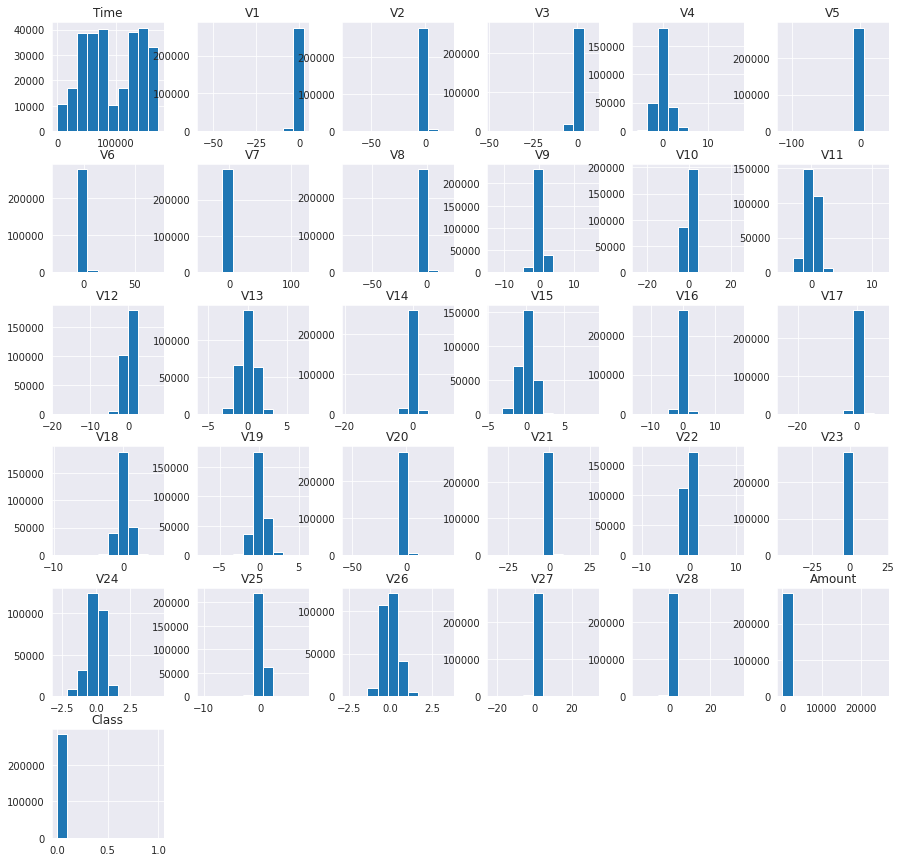

In [ ]:
df.hist(figsize=(15,15)); #size of the output image

Some observations on our plot
There's no correlation with one another. Though some data points create a sort of linear line going from right to left when graphing Time vs V1. There are two clusters of data when graphing Amount against Time.

**Scatter Plots**

<Figure size 1440x720 with 0 Axes>

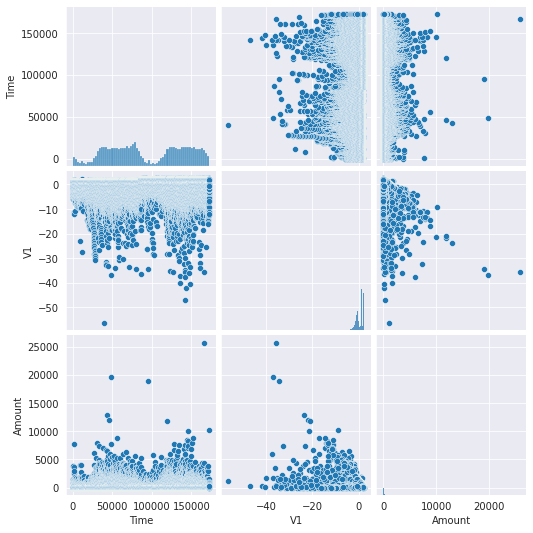

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(df[["Time","V1", "Amount"]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


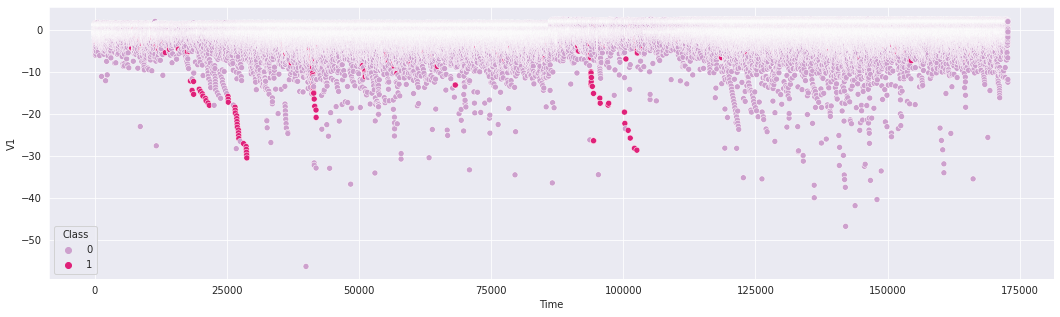

In [ ]:
plt.figure(figsize=(18,5))
sns.scatterplot(df["Time"], df["V1"], hue=df["Class"], palette = 'PuRd')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


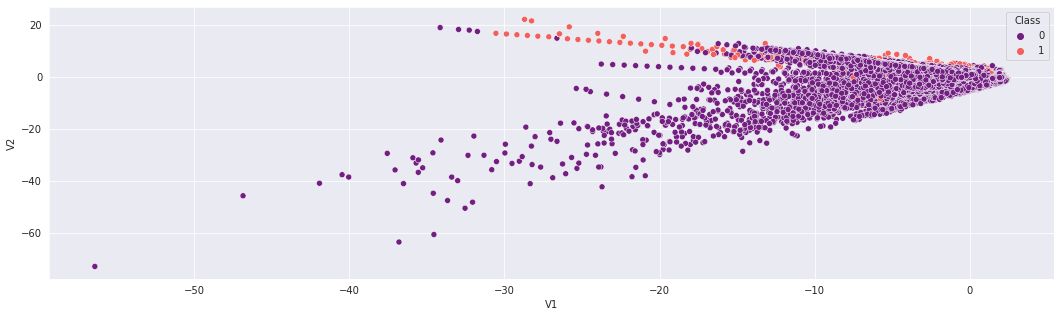

In [ ]:
plt.figure(figsize=(18,5))
sns.scatterplot(df["V1"], df["V2"], hue=df["Class"], palette = 'magma')

Looking back at the linearity that I observed in the earlier diagram appears to be consistent, a form of trend for many of the fraudulent cases (pinkish-red), relative to the non-fraudulent ones (purple). There's a chain-together with a hand of them scattered here and there. The consistency between that is indicative of V1 having captured information that can be used to separate class 0 from class 1.

### **3. Preprocessing**


The vector columns are of a much reduced/smaller magnitude compare to their Time and Amount counterparts. This needs to be looked into so as to avoid it affecting our model performance. 

Let's use StandardScaler library from Scikit-Learn. Then, we will split the data into out X (input) and y (output) sections.

**Scale & Separate the data**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.iloc[:, :-1]
y = df.Class.values.ravel()

X_scaled = scaler.fit_transform(X)

**Train Test Split**

For the split data, we use training set to train the model, and the testing set to enforce that the models performance is consistent on never-before-seen data. This helps avoid over-fitting of the model and for generalisation.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


### **4. Model Development**

Import Tensorflow for our ANN Model dev

**Artificial Neural Network using Keras**

In [ ]:
#Artificial Neural Network using Keras:
from tensorflow import keras
print(keras.__version__)

2.7.0


In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[-1],)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

#defined by three layers (input for data, hidden layer with their activation function and the output layer)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 38,497
Trainable params: 38,497
Non-traina

We see that four Dense layers surrounds two Dropout layers showing good results. 

**What is a Dense Layer in ANN?**

A Dense layer takes in a number of different arguments in neural networks. Within the scope of this model, it takes in two arguments: **‘128’** which is the *number of units*, and **‘relu’** which is the *activation function*.

**Model Summary:** Displays a better good view of the model’s architecture. 

We also see that the Output shape (middle column) is representative of the layer’s units. We first use 32 (the number of columns in the dataset), then we increase this to 128, then 256, and then sharply shrink this down to 1, which depicts the output of the model.





**Model Build**

Let's use a generic Adam optimizer to control the learning rate, and assign the loss as binary crossentropy being a binary dataset.

In [ ]:
#build model
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

Now that we the model compiled, let's fit the model with the dataset. We will use the training set as input, and assign a batch_size of 2048 which will run with 40 epochs.

In [ ]:
history = model.fit(
                    X_train,
                    y_train,
                    batch_size=2048,
                    epochs=40,
                    verbose=2,
                    validation_split = 0.2)

Epoch 1/40
90/90 - 2s - loss: 0.0258 - accuracy: 0.9983 - val_loss: 0.0136 - val_accuracy: 0.9981 - 2s/epoch - 27ms/step
Epoch 2/40
90/90 - 2s - loss: 0.0140 - accuracy: 0.9983 - val_loss: 0.0136 - val_accuracy: 0.9981 - 2s/epoch - 26ms/step
Epoch 3/40
90/90 - 2s - loss: 0.0126 - accuracy: 0.9983 - val_loss: 0.0136 - val_accuracy: 0.9981 - 2s/epoch - 26ms/step
Epoch 4/40
90/90 - 2s - loss: 0.0128 - accuracy: 0.9983 - val_loss: 0.0136 - val_accuracy: 0.9981 - 2s/epoch - 26ms/step
Epoch 5/40
90/90 - 2s - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0136 - val_accuracy: 0.9981 - 2s/epoch - 25ms/step
Epoch 6/40
90/90 - 2s - loss: 0.0126 - accuracy: 0.9983 - val_loss: 0.0136 - val_accuracy: 0.9981 - 2s/epoch - 26ms/step
Epoch 7/40
90/90 - 2s - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0136 - val_accuracy: 0.9981 - 2s/epoch - 26ms/step
Epoch 8/40
90/90 - 2s - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0136 - val_accuracy: 0.9981 - 2s/epoch - 25ms/step
Epoch 9/40
90/90 - 2s - loss: 0.

Yes, our model trained, we can review the output of the model, call the history’s keys and review the metrics captured. We got a relatively high accuracy, with minimal loss which means the model is working.

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
results = pd.DataFrame(history.history)
results.head(5)

,loss,accuracy,val_loss,val_accuracy
0,0.025833,0.998294,0.013606,0.998135
1,0.014035,0.998261,0.013598,0.998135
2,0.012589,0.998305,0.013594,0.998135
3,0.012819,0.998288,0.013589,0.998135
4,0.012522,0.998305,0.013587,0.998135


In [ ]:
score1 = model.evaluate(X_test, y_test)
score1

1781/1781 [==============================] - 3s 2ms/step - loss: 0.0127 - accuracy: 0.9983


[0.012670069001615047, 0.9982795715332031]

**Our loss is low and the accuracy(99.8%) us high, it shows our model learned.**

(array([0.01 , 0.012, 0.014, 0.016, 0.018, 0.02 , 0.022, 0.024, 0.026,
        0.028]), <a list of 10 Text major ticklabel objects>)

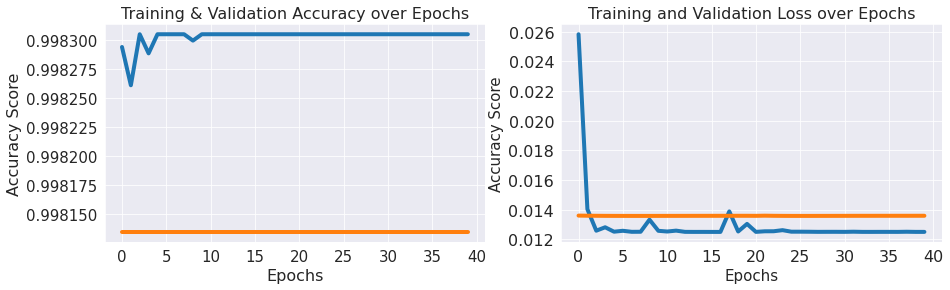

In [ ]:
plt.figure(figsize = (15,4))

plt.subplot(121)
plt.plot(results.index, results.accuracy, label="Training Accuracy", linewidth=4)
plt.plot(results.index, results.val_accuracy, label="Validation Accuracy", linewidth=4)
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Accuracy Score", fontsize=16)
plt.title("Training & Validation Accuracy over Epochs" , fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(122)
plt.plot(results.index, results.loss, label="Training Loss", linewidth=4)
plt.plot(results.index, results.val_loss, label="Validation Loss", linewidth=4)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.title("Training and Validation Loss over Epochs", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#### **4. Artificial Neural Network using Keras with Metrics & Weights**:

In [ ]:

counts = np.bincount(y_train)
wt_0 = 1.0 / counts[0]
wt_1 = 1.0 / counts[1]

print(wt_0)
print(wt_1)

4.396551345124884e-06
0.0025380710659898475


In [ ]:
model_2 = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               7936      
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 139,777
Trainable params: 139,777
Non-tr

In [ ]:

metrics = [
    keras.metrics.Precision(name="precision"),
#     keras.metrics.Recall(name="recall"),
#     keras.metrics.Accuracy(name="accuracy")
]

model_2.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)



history = model_2.fit(
                    X_train,
                    y_train,
                    batch_size=2048,
                    epochs=30,
                    verbose=2,
                    validation_split = 0.2,
                    class_weight = {0: wt_0, 1: wt_1}
)

Epoch 1/30
90/90 - 6s - loss: 0.0086 - precision: 0.0017 - val_loss: 0.6985 - val_precision: 0.0019 - 6s/epoch - 65ms/step
Epoch 2/30
90/90 - 5s - loss: 1.2919e-05 - precision: 0.0018 - val_loss: 0.6552 - val_precision: 0.0000e+00 - 5s/epoch - 52ms/step
Epoch 3/30
90/90 - 5s - loss: 6.1847e-06 - precision: 0.0022 - val_loss: 0.6718 - val_precision: 0.0000e+00 - 5s/epoch - 51ms/step
Epoch 4/30
90/90 - 5s - loss: 6.0314e-06 - precision: 0.0015 - val_loss: 0.6954 - val_precision: 0.0000e+00 - 5s/epoch - 52ms/step
Epoch 5/30
90/90 - 5s - loss: 6.0707e-06 - precision: 0.0026 - val_loss: 0.6921 - val_precision: 0.0000e+00 - 5s/epoch - 51ms/step
Epoch 6/30
90/90 - 5s - loss: 6.0209e-06 - precision: 0.0015 - val_loss: 0.6934 - val_precision: 0.0000e+00 - 5s/epoch - 52ms/step
Epoch 7/30
90/90 - 5s - loss: 6.0308e-06 - precision: 0.0037 - val_loss: 0.6797 - val_precision: 0.0000e+00 - 5s/epoch - 51ms/step
Epoch 8/30
90/90 - 5s - loss: 6.0236e-06 - precision: 0.0161 - val_loss: 0.6865 - val_preci

In [ ]:
score = model_2.evaluate(X_test, y_test)

1781/1781 [==============================] - 3s 2ms/step - loss: 0.7859 - precision: 0.0017


In [ ]:
score

[0.785880446434021, 0.001720717060379684]

The loss here is high and precision is low